In [1]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Text,ForeignKey
from sqlalchemy.orm import sessionmaker, relationship

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [5]:
user = "root"
password = "ashish14"
host = "127.0.0.1"
port = 3306

In [11]:
engine = create_engine('mysql://{0}:{1}@{2}:{3}/'.format(user, password, host, port),echo=False)

In [12]:
existing_databases = engine.execute("show databases;")
existing_databases = [d[0] for d in existing_databases]
engine.execute("use StackExchange;")

In [65]:
df = pd.read_sql("select * from Comment",con=engine)

In [66]:
df.head()

,Id,CreationDate,PostId,Score,Text,UserId
0,100,2014-05-17T08:29:53.633,113,1,This page http://www.mongodb.com/nosql-explain...,211
1,10000,2016-02-06T03:15:56.340,10101,0,"No problem, thanks for the vote.",10384
2,10001,2016-02-06T14:23:05.187,10103,0,Did you try map-reduc'ing in a framework like ...,11097
3,10002,2016-02-06T14:46:32.263,10103,0,Nope.. how does it work and can you please dir...,16024
4,10003,2016-02-06T14:48:23.540,10103,0,Pl go through [Spark's documentation](http://s...,11097


In [15]:
df.shape

(12677, 6)

In [24]:
df.dtypes

Id              object
CreationDate    object
PostId          object
Score           object
Text            object
UserId          object
dtype: object

In [67]:
df[["Id","PostId","Score","UserId"]] = df[["Id","PostId","Score","UserId"]].apply(pd.to_numeric)

In [56]:
df.dtypes

Id                int64
CreationDate     object
PostId            int64
Score             int64
Text             object
UserId          float64
dtype: object

In [31]:
df.Score.value_counts()

0     10626
1      1555
2       336
3        86
4        33
5        18
6         6
7         5
9         4
12        3
8         2
14        1
10        1
17        1
Name: Score, dtype: int64

### df[['two', 'three']] = df[['two', 'three']].astype(float)
### df = pd.DataFrame(a, columns=['one', 'two', 'three'], dtype={'one': str, 'two': int, 'three': float})

In [72]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re,string,nltk

In [73]:
stopwords = stopwords.words("english")

In [68]:
df["Text"] = df["Text"].apply(lambda x:x.lower())

In [69]:
df["Text"] = df["Text"].apply(lambda x:re.sub(r'https?:\/\/.*\/\w*','',x))
df["Text"] = df["Text"].apply(lambda x:re.sub(r'['+string.punctuation+']+', ' ',x) )

In [70]:
df["Text"] = df["Text"].apply(lambda x:word_tokenize(x))

In [77]:
df["Text"] = df["Text"].apply(lambda x:[i for i in x if i not in stopwords])

In [78]:
df.Text.head()

0              [page, explained, provides, details]
1                           [problem, thanks, vote]
2    [try, map, reduc, ing, framework, like, spark]
3                      [nope, work, please, direct]
4     [pl, go, spark, documentation, understanding]
Name: Text, dtype: object

In [79]:
interested_words = ["spark","map","reduce","reduc","hadoop","big","data"]

In [80]:
from collections import Counter

In [85]:
counts = Counter()

In [87]:
for i in df.Text:
    for j in i:
        counts[j] = counts[j] + 1

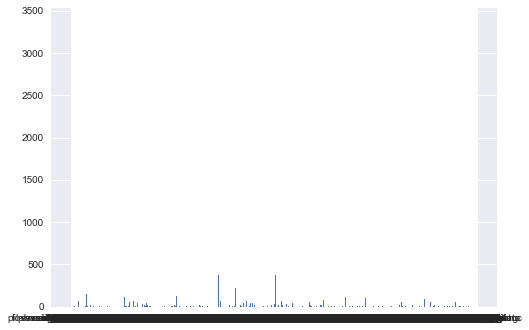

In [89]:
plt.bar(range(len(counts)), counts.values(), align='center')
plt.xticks(range(len(counts)), counts.keys())
plt.show()

In [51]:
punctuation = string.punctuation

In [52]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'